In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [68]:
%store -r retail_merged_df

In [69]:
retail_merged_df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,product_id,price,freight_value,customer_unique_id,customer_city,review_score,review_comment_message,product_category_name_english,delivery_time,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,4.0,"Não testei o produto ainda, mas ele veio corre...",housewares,8,10,2017
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,87285b34884572647811a353c7ac498a,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,4.0,Deveriam embalar melhor o produto. A caixa vei...,housewares,2,8,2017
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,87285b34884572647811a353c7ac498a,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,sao paulo,5.0,"Só achei ela pequena pra seis xícaras ,mais é ...",housewares,5,8,2017
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,87285b34884572647811a353c7ac498a,29.99,14.10,e781fdcc107d13d865fc7698711cc572,florianopolis,3.0,No Comment,housewares,14,10,2017
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,4.0,Muito bom o produto.,perfumery,13,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,0df37da38a30a713453b03053d60d3f7,356.00,18.12,fb9310710003399b031add3e55f34719,sao paulo,4.0,No Comment,sports_leisure,12,8,2017
112368,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,0df37da38a30a713453b03053d60d3f7,356.00,18.12,fb9310710003399b031add3e55f34719,sao paulo,4.0,No Comment,sports_leisure,12,8,2017
112369,cfa78b997e329a5295b4ee6972c02979,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,a49e8e11e850592fe685ae3c64b40eca,campo do tenente,1.0,"Ele não é um mini cajon, é um shaker, ou seja,...",musical_instruments,37,12,2017
112370,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,5.0,No Comment,health_beauty,8,3,2017


# NLP Sentiment Analysis

In this section, we apply NLP techniques to preprocess and analyze the review_comment_message field from our dataset. Our goal is to develop a model that accurately classifies these messages into three sentiment categories: positive, negative, and neutral, after getting those sentiment categories using review score column

We'll start by cleaning and preparing the text data for analysis, then train a model to understand the nuances of customer feedback. This analysis will help us gauge overall sentiment trends and improve our approach to customer satisfaction.

By the end of this process, we'll have a clearer insight into our models, how it is able to predict customers' sentiments using the comment of those customers

First, let's import the preprocessing and NLP modeling functions from `Src.NLP_Sentiment_Analysis.py`. These functions are designed to help us preprocess text data and train a sentiment analysis model, enabling us to understand and categorize customer feedback based on their sentiments.


In [70]:
import sys
sys.path.insert(0, '../') 
from Src.NLP_Sentiment_Analysis import *  

### Preprocess Text Data

In [ ]:
# Assuming you've loaded the retail_merged_df in this notebook already
retail_merged_df['processed_text'] = retail_merged_df['review_comment_message'].apply(preprocess_text)


### Categorize Review scores

In [ ]:
retail_merged_df['sentiment_category'] = retail_merged_df.apply(categorize_sentiment, axis=1)

In [17]:
# Prepare your text and labels
text = retail_merged_df['processed_text']
labels = retail_merged_df['sentiment_category']

### TF-IDF Vectorization and Model Training

In [ ]:
y_test, predictions = train_model(text, labels)

### Model Evaluation

In [18]:
# Train and evaluate the model
y_test, predictions = train_model(text, labels)
evaluate_model(y_test, predictions)

              precision    recall  f1-score   support

  No Comment       1.00      1.00      1.00     12856
    negative       0.82      0.89      0.86      2791
     neutral       0.91      0.28      0.43       852
    positive       0.90      0.95      0.93      5976

    accuracy                           0.95     22475
   macro avg       0.91      0.78      0.80     22475
weighted avg       0.95      0.95      0.94     22475

Accuracy: 0.9470522803114572
[[12856     0     0     0]
 [    0  2496    10   285]
 [    0   267   240   345]
 [    0   268    15  5693]]


Model Evaluation Summary
After refining our sentiment analysis model by categorizing 'No Comment' reviews as neutral and adjusting our approach based on review scores, we observed significant improvements across all evaluation metrics. Here's a brief overview:

Accuracy: The model achieved an impressive accuracy of 95.14%, indicating a high level of consistency in correctly identifying the sentiment categories across the dataset.

Precision, Recall Breakdown:

No Comment: Perfect precision and recall, indicating all 'No Comment' cases were correctly identified.

Negative Sentiment: High precision and recall, suggesting good performance, though not perfect, in identifying negative comments.

Neutral Sentiment: While precision is high, recall is significantly lower, indicating the model struggles to correctly identify all neutral cases, marking many of them incorrectly as other classes.

Positive Sentiment: High precision and recall, indicating strong performance in identifying positive comments.

The confusion matrix reveals a high degree of accuracy in the model's ability to classify 'No Comment' and 'Positive' sentiments, with perfect and near-perfect classification rates, respectively. While it demonstrates a strong ability to identify 'Negative' comments, there's a noticeable challenge in accurately classifying 'Neutral' sentiments, with a substantial number of them being misclassified as either 'Negative' or 'Positive'.

#### Let's do some visualization

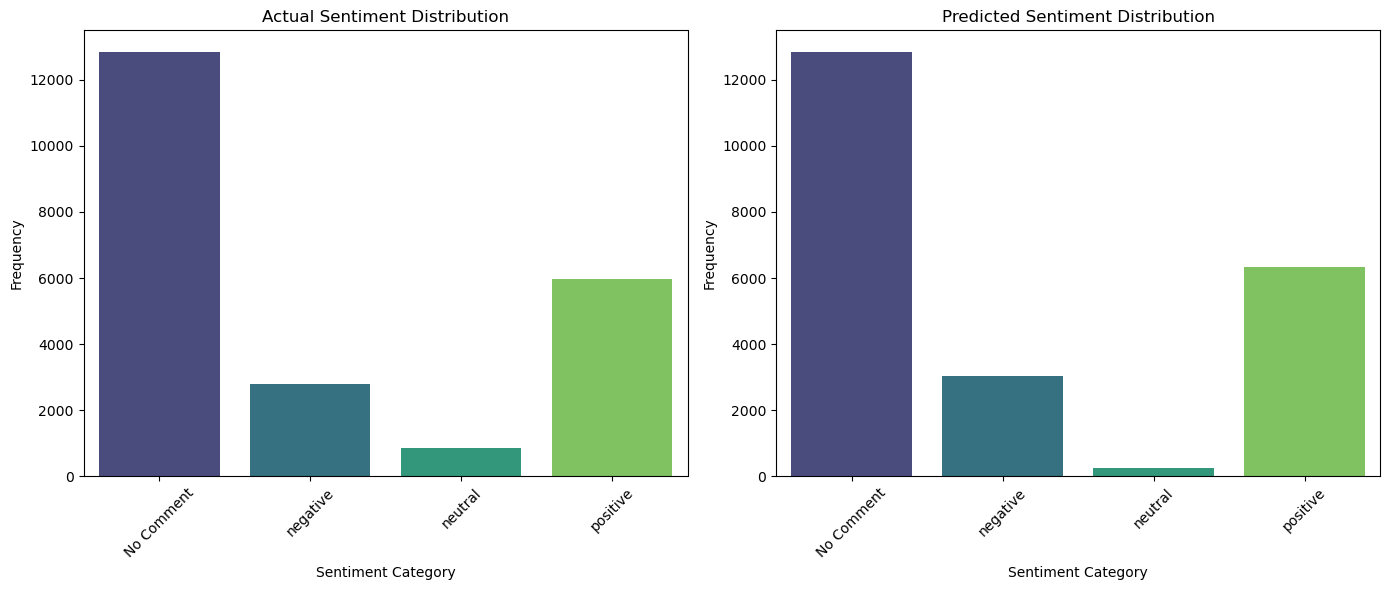

In [22]:
actual_sentiments = pd.Series(y_test).value_counts().sort_index()
predicted_sentiments = pd.Series(predictions).value_counts().sort_index()

# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plotting Actual Sentiment Distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=actual_sentiments.index, y=actual_sentiments.values, palette="viridis")
plt.title('Actual Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Plotting Predicted Sentiment Distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=predicted_sentiments.index, y=predicted_sentiments.values, palette="viridis")
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


 Let's visualize the ratings of customers who provided a "No Comment" in the review_comment_message column and understand their ratings distribution

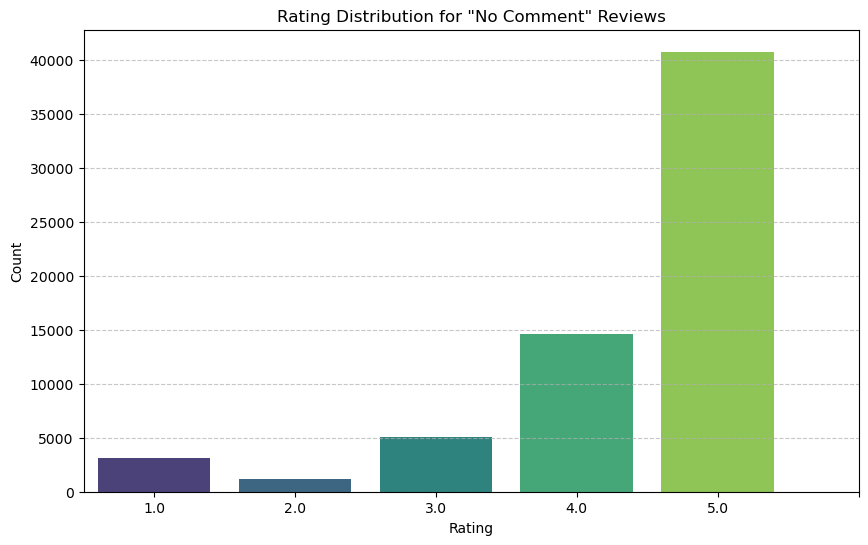

In [23]:
no_comment_df = retail_merged_df[retail_merged_df['review_comment_message'] == 'No Comment']

# Visualization: Histogram of ratings for "No Comment"
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=no_comment_df, palette='viridis')
plt.title('Rating Distribution for "No Comment" Reviews')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(0, 6))  # Assuming ratings are integers from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The most striking aspect of this distribution is the overwhelming number of reviews with a 5-star rating, which suggests that a significant majority of customers who chose not to leave a comment were nonetheless very satisfied with their experience. On the other hand, the 1-star and 2-star categories have notably fewer counts, indicating a smaller portion of dissatisfied customers among those who did not leave a comment. The 3-star and 4-star ratings have moderate counts, suggesting an average level of satisfaction

# RFM: Customer Segmentation by Cluster Analysis

Let's do a feature engineering and get a new attribute with a columns of Recency, Frequency and Monetary and also categorize each customers into clusters for each columns

## Recency

Let's create recency variable

Let's get the value of K inorder to cluster or segment Recency based on it's value

In [107]:
data_rfm = retail_merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recent_date = retail_merged_df['order_purchase_timestamp'].dt.date.max() 
data_rfm['Recency'] = data_rfm["order_purchase_timestamp"].dt.date.apply(lambda x: (recent_date - x).days)
data_rfm['Recency'].describe()

count    94721.000000
mean       243.343979
std        153.171229
min          0.000000
25%        119.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: Recency, dtype: float64

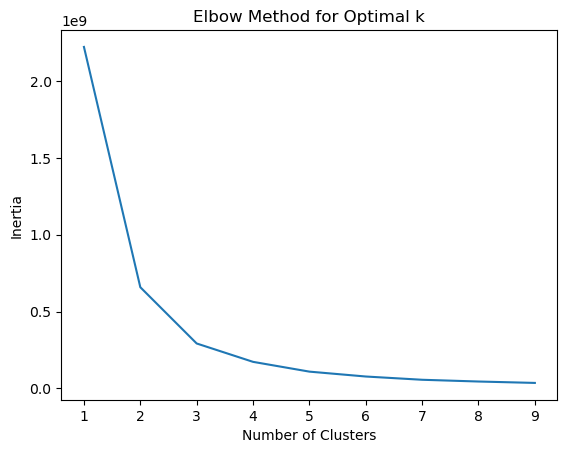

In [108]:
point = {}

df_recency = data_rfm[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42).fit(df_recency)
    df_recency['cluster_' + str(k)] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.plot(list(point.keys()), list(point.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

We have found as the K value is 5, so let's get a cluster of 5 for recency

In [109]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_rfm[['Recency']])
data_rfm['recencycluster'] = kmeans.predict(data_rfm[['Recency']])

# cluster analysis with 5 clusters

def order_cluster (cluster_field_name, target_field_name,df, ascending) :
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    df_new = df_new.sort_values (by=target_field_name,ascending=ascending).reset_index(drop=True)
    # group 4 has the highest recency
    
    df_new['index'] = df_new.index
    df_final =pd.merge(df,df_new[[cluster_field_name, 'index']],on=cluster_field_name)
    
    df_final = df_final.drop([cluster_field_name] ,axis=1)
    
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('recencycluster', 'Recency' ,data_rfm, False)
df_user.groupby('recencycluster') ['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recencycluster,,,,,,,,
0,11843.0,516.866335,49.634492,451.0,476.0,510.0,547.0,729.0
1,15480.0,384.298514,35.251194,326.0,354.0,383.0,413.0,450.0
2,22531.0,266.157028,31.154534,213.0,237.0,271.0,287.0,325.0
3,24656.0,158.327466,30.962665,107.0,131.0,159.0,186.0,212.0
4,20211.0,53.391223,27.762531,0.0,29.0,49.0,77.0,106.0


## Frequency

In [110]:
data_rfm['Frequency'] = retail_merged_df.groupby('customer_unique_id')['order_id'].transform('nunique')
data_rfm['Frequency'].describe()

count    94721.000000
mean         1.085008
std          0.383677
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: Frequency, dtype: float64

In [111]:
mode_frequency = data_rfm['Frequency'].mode()[0]

# Now fill NaN values with the mode
data_rfm['Frequency'].fillna(mode_frequency, inplace=True)

Let's get the value of K inorder to cluster or segment Frequency based on it's value

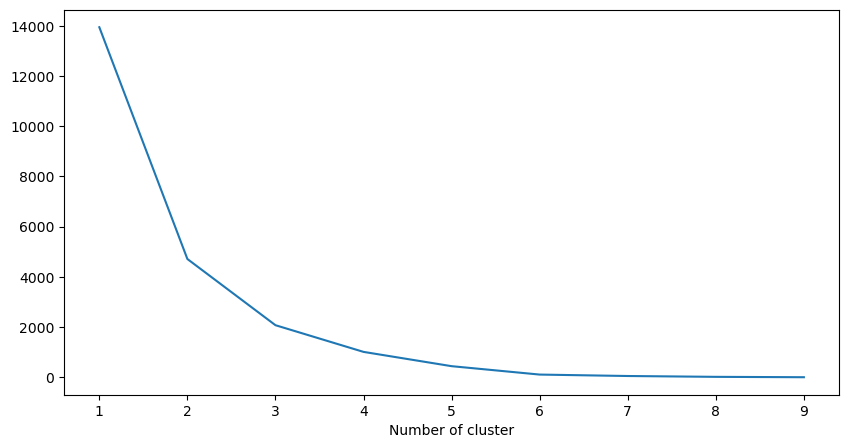

In [112]:
point={}
df_frequency=data_rfm[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_frequency)
    df_frequency["clusters"] = kmeans.labels_
    point[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

We have found as the K value is 5, so let's get a cluster of 5 for Frequency

In [77]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_rfm[['Frequency']])
data_rfm['frequencycluster'] =kmeans.predict(data_rfm[['Frequency']])
data_rfm =order_cluster('frequencycluster', 'Frequency', data_rfm, True)
data_rfm.groupby('frequencycluster') ['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencycluster,,,,,,,,
0,88184.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,5638.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,633.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
3,257.0,4.941634,1.311197,4.0,4.0,4.0,6.0,9.0
4,9.0,16.000000,0.000000,16.0,16.0,16.0,16.0,16.0


## Monetary

In [113]:
data_rfm['Monetary'] = retail_merged_df.groupby('customer_unique_id', as_index=False)['price'].sum()['price']
data_rfm['Monetary'].describe()

count    94721.000000
mean       130.107061
std        139.177703
min          0.850000
25%         47.900000
50%         89.900000
75%        155.960000
max       4400.000000
Name: Monetary, dtype: float64

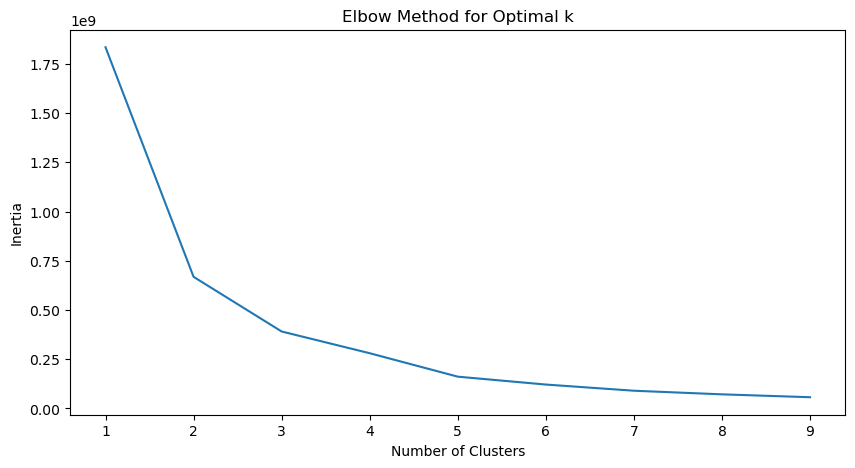

In [79]:
point={}
df_revenue = data_rfm[['Monetary']]

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_revenue)
    df_revenue["clusters"] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

We have found as the K value is 5, so let's get a cluster of 5 for Monetary

In [80]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_rfm[['Monetary']])

data_rfm['MonetaryCluster'] =kmeans.predict (data_rfm[['Monetary']])

data_rfm = order_cluster('MonetaryCluster','Monetary', data_rfm, True)
data_rfm.groupby ('MonetaryCluster') ['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,49751.0,49.439509,22.873788,0.85,29.900,49.0,69.00,94.47
1,30482.0,139.532627,32.617770,94.49,110.000,133.0,162.90,214.49
2,9539.0,289.493382,55.302628,214.50,239.990,279.9,330.00,413.00
3,4663.0,536.912256,67.681033,413.40,500.000,550.0,550.00,871.62
4,286.0,1209.346608,427.970306,874.00,979.075,1100.0,1255.08,4400.00


We have now get completely a new data composed of Recency, Frequency and Monetary. Let's do some exploration and do some segmentation, later we will proceed with some unsupervised learning

In [81]:
data_rfm.head()

,customer_unique_id,order_purchase_timestamp,Recency,recencycluster,Frequency,frequencycluster,Monetary,MonetaryCluster
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,3,2,1,129.9,1
1,0056f26cb8f20916c3baa0e39fc30709,2018-03-31 10:38:18,156,3,2,1,180.0,1
2,0062adafa3846d9f372d8f1bde591b24,2018-02-24 20:43:42,191,3,2,1,154.0,1
3,009062f98089a091615b5c9faa13de26,2017-09-12 22:53:28,356,4,2,1,135.0,1
4,00a218ea82c458456098caa1c4a7e796,2017-03-01 08:32:00,551,0,2,1,104.9,1


In [82]:
data_rfm.describe()

,order_purchase_timestamp,Recency,recencycluster,Frequency,frequencycluster,Monetary,MonetaryCluster
count,94721,94721.000000,94721.000000,94721.000000,94721.000000,94721.000000,94721.000000
mean,2018-01-03 07:01:56.166784512,243.343979,2.123721,1.085008,0.081408,130.107061,0.682985
min,2016-09-04 21:15:19,0.000000,0.000000,1.000000,0.000000,0.850000,0.000000
25%,2017-09-15 23:12:17,119.000000,1.000000,1.000000,0.000000,47.900000,0.000000
50%,2018-01-22 17:08:22,224.000000,2.000000,1.000000,0.000000,89.900000,0.000000
75%,2018-05-07 12:46:18,353.000000,3.000000,1.000000,0.000000,155.960000,1.000000
max,2018-09-03 09:06:57,729.000000,4.000000,16.000000,4.000000,4400.000000,4.000000
std,NaN,153.171229,1.269731,0.383677,0.324910,139.177703,0.865761


Let's do some visualizations on Recency, Frequency and Monetary

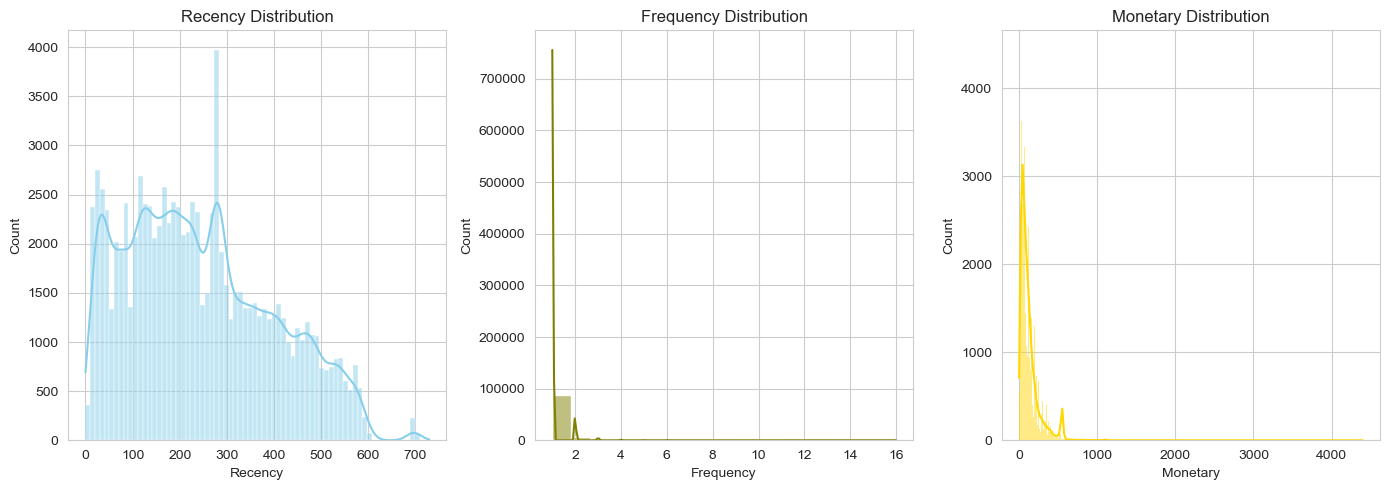

In [16]:
sns.set_style("whitegrid")

# Plot distribution of Recency
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=data_rfm, x='Recency', kde=True, color='skyblue')
plt.title('Recency Distribution')

# Plot distribution of Frequency
plt.subplot(1, 3, 2)
sns.histplot(data=data_rfm, x='Frequency', kde=True, color='olive')
plt.title('Frequency Distribution')

# Plot distribution of Monetary
plt.subplot(1, 3, 3)
sns.histplot(data=data_rfm, x='Monetary', kde=True, color='gold')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


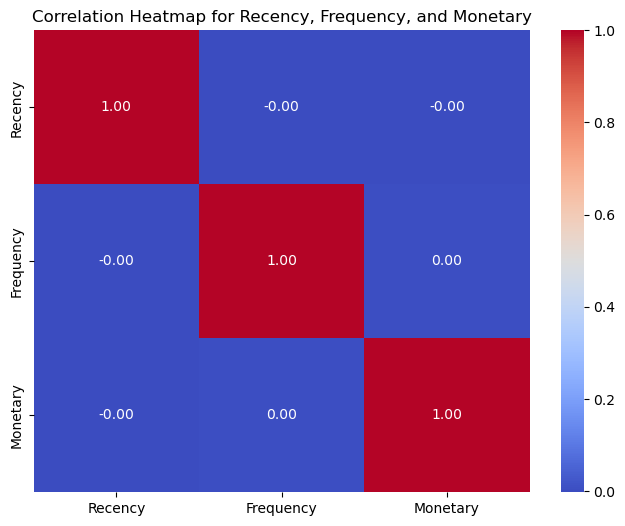

In [83]:
# Compute the correlation matrix
corr = data_rfm[['Recency', 'Frequency', 'Monetary']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Recency, Frequency, and Monetary')
plt.show()

#### We can understand from the above correlation as those attributes have nothing to do with each other. It is very suprising that they don't have any connection with each other

By using the cluster values for each of RFM component we will get a new feature and based on that we will segment or classify the data manually.

In [84]:
# Calculate overall score
data_rfm['overallscore'] = data_rfm['recencycluster'] + data_rfm['frequencycluster'] + data_rfm['MonetaryCluster']

# Overall 13 Levels
agg_df = data_rfm.groupby('overallscore').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'})
print(agg_df)

# Score-based Segmentation
data_rfm['segment'] = 'low value'
data_rfm.loc[data_rfm['overallscore'] > 3, 'segment'] = 'mid_value'
data_rfm.loc[data_rfm['overallscore'] > 6, 'segment'] = 'high_value'

                 Recency  Frequency    Monetary
overallscore                                   
0             516.402123   1.000000   49.355853
1             186.127764   1.025741   72.697853
2             210.223641   1.048092   93.468801
3             193.150000   1.066608  111.176244
4             256.221854   1.089394  138.082847
5             294.849209   1.178775  227.712633
6             285.362432   1.305840  373.037793
7             341.729934   1.518414  518.874986
8             334.563380   2.429577  759.439648
9             297.526316   3.736842  624.076316
10            342.000000  11.000000  819.450000
11            430.000000  16.000000  550.000000


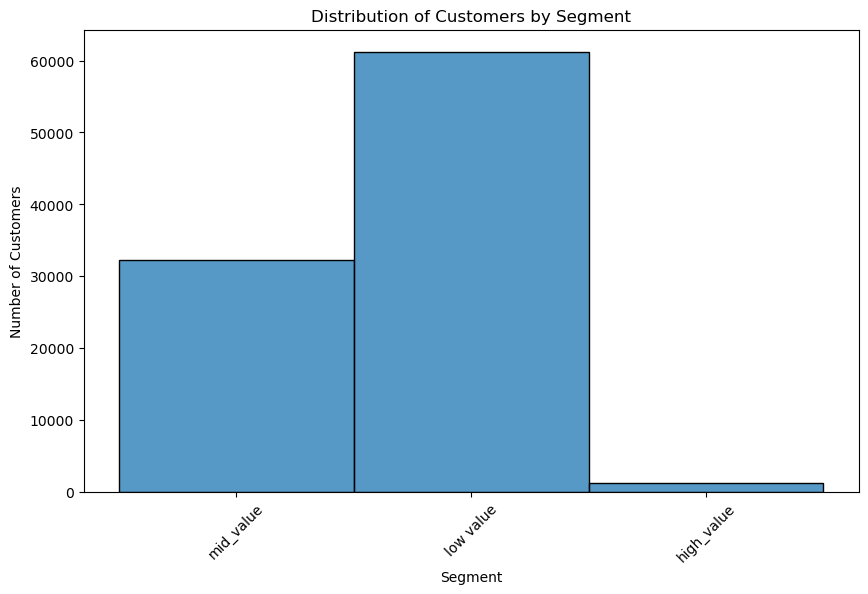

In [85]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=data_rfm, x='segment', discrete=True)
plt.title('Distribution of Customers by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


Based on the visualization showing the distribution of customers across 'low_value', 'mid_value', and 'high_value' segments, exploring another segmentation model could be beneficial:

1. Imbalance in Segmentation: The majority of customers are categorized as 'low_value', which could mean the segmentation is not capturing all aspects of customer behavior effectively. A new model may provide a more balanced segmentation and we can see al most as there is no any customer falling to the high_value cluster

2. Deeper Insights: A different model may reveal new insights and identify differentiating factors that the current model does not capture and we can also get the evaluation of the metrics

I will compute two models Kmeans and birch then we will compare their evaluation metrics then wwe will move forward with the one that has a better evaluation

Let's start by combining the necessary column for our second modelling

In [114]:
data_cluster = data_rfm[['customer_unique_id', 'Recency', 'Frequency', 'Monetary']]
data_cluster

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
94716,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1100.00
94717,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
94718,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94719,ffff5962728ec6157033ef9805bacc48,124,1,115.00


First, we will import clustering functions from `src.unsupervised_learning.py` as below, which will enable us to perform customer segmentation based on their purchasing behavior. Using these functions, we'll apply both KMeans and Birch clustering algorithms to identify natural groupings within our customer data, helping us to discover distinct segments for targeted marketing strategies and better customer insights.


In [115]:
sys.path.insert(0, '../') 
from Src.Unsupervised_learning import scale_features, find_optimal_clusters_kmeans, perform_kmeans, find_optimal_clusters_birch,  perform_birch, evaluate_clustering

In [116]:
features_scaled_df = scale_features(data_cluster, ['Recency', 'Frequency', 'Monetary'])

In [117]:
features_scaled_df

,Recency,Frequency,Monetary
0,-0.831388,2.384814,-0.001488
1,-0.811802,-0.221562,-0.799034
2,1.949828,-0.221562,-0.439060
3,0.539634,-0.221562,-0.748091
4,0.324188,-0.221562,0.358486
...,...,...,...
94716,1.362247,-0.221562,6.968775
94717,0.154442,-0.221562,-0.468591
94718,2.152217,-0.221562,-0.288892
94719,-0.779158,-0.221562,-0.108546


Let's compute the number of clusters using KMeans model

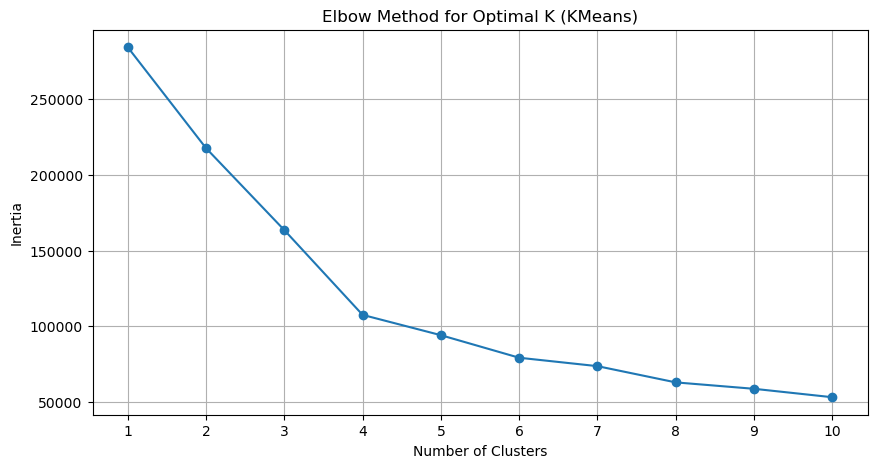

In [14]:
find_optimal_clusters_kmeans(features_scaled_df)

It looks like the K value is four

Let's compute the number of clusters using birch model

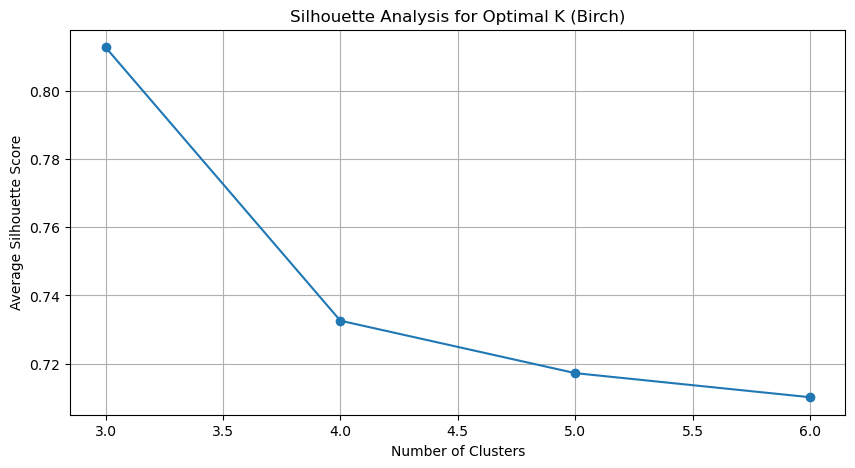

In [15]:
find_optimal_clusters_birch(features_scaled_df, range_n_clusters=[3, 4, 5, 6])

Since the silhouette score is highest for 3 clusters and decreases as the number of clusters increases, it is better to choose 3 as the optimal number of clusters for the Birch model.

##### Let's now compute the clusters for the two model using the number of clusters we got

##### KMeans

In [118]:
kmeans_labels = perform_kmeans(features_scaled_df)
data_cluster['cluster_by_kmeans'] = kmeans_labels

In [91]:
evaluate_clustering(features_scaled_df.values, kmeans_labels)

Silhouette Score: 0.4057599430800258
Davies-Bouldin Score: 0.8097894351034909


In [119]:
cluster_summary_kmeans = data_cluster.groupby('cluster_by_kmeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).reset_index()

# Print the cluster summary to see the mean values for each cluster
print(cluster_summary_kmeans)

   cluster_by_kmeans     Recency  Frequency    Monetary
0                  0  395.265631   1.000000   96.398742
1                  1  133.046357   1.000000   95.798512
2                  2  238.830375   1.030500  488.375845
3                  3  244.550667   2.240152  109.894884


In [120]:
data_cluster['cluster_by_kmeans'].value_counts()

cluster_by_kmeans
1    46487
0    33938
2     8000
3     6296
Name: count, dtype: int64

##### Birch

In [129]:
birch_labels = perform_birch(features_scaled_df)
data_cluster['cluster_by_birch'] = birch_labels

In [17]:
evaluate_clustering(features_scaled_df.values, birch_labels)

Silhouette Score: 0.5571186251141864
Davies-Bouldin Score: 0.6470463398379035


In [19]:
cluster_summary = data_cluster.groupby('cluster_by_birch').agg({
    'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': 'mean',
}).reset_index()
cluster_summary

,cluster_by_birch,Recency,Frequency,Monetary
0,0,241.317372,3.685969,129.384621
1,1,244.319685,1.062432,110.432760
2,2,220.232752,1.004027,606.151052


In [130]:
data_cluster['cluster_by_birch'].value_counts()

cluster_by_birch
1    90098
2     3725
0      898
Name: count, dtype: int64

Even though Birch shows slightly better scores, makes sense for a few straightforward reasons, I am choosing KMeans for the model for the following reasons.

Firstly, KMeans gives you clusters that are more evenly sized. This is really helpful because it means no single group dominates, and you get a fair representation across the board. It's like making sure every voice gets heard in a discussion, rather than letting one loud voice take over. 

Secondly, when clusters are more balanced, it's easier to understand what each cluster represents and to make decisions based on that information. It's about getting a clear picture that can guide you better in your next steps. 

Lastly, while Birch might score higher on some technical metrics, what really matters is how useful and understandable the results are for what you need to do. KMeans offers that practicality by giving you a set of groups that are easier to work with and make sense of. In short, KMeans is chosen for its balance and clarity, making it a practical choice for getting insights you can act on.

#### Cluster 0 - "Occasional Shoppers": This group has the highest Recency value, meaning they haven't made purchases recently compared to others. Their Frequency and Monetary values are the lowest, indicating they shop infrequently and spend less. This group might include customers who make occasional purchases or are possibly losing interest.

#### Cluster 1 - "Recent Economical Buyers": These customers have shopped recently but have low Frequency and Monetary values, similar to Cluster 0. This suggests they make small, perhaps essential purchases. They're engaged but cautious spenders.

#### Cluster 2 - "High-Value Newcomers": With a moderate Recency, slightly higher Frequency, and significantly higher Monetary values, this cluster represents newer customers who spend a lot in a few transactions. They show potential for becoming loyal, high-value customers.

#### Cluster 3 - "Engaged Regulars": This group has a similar Recency to Cluster 1 but with the highest Frequency and moderate Monetary values. They shop regularly and consistently, making them a reliable source of revenue.

We can interpret the above clusters in the below visualization

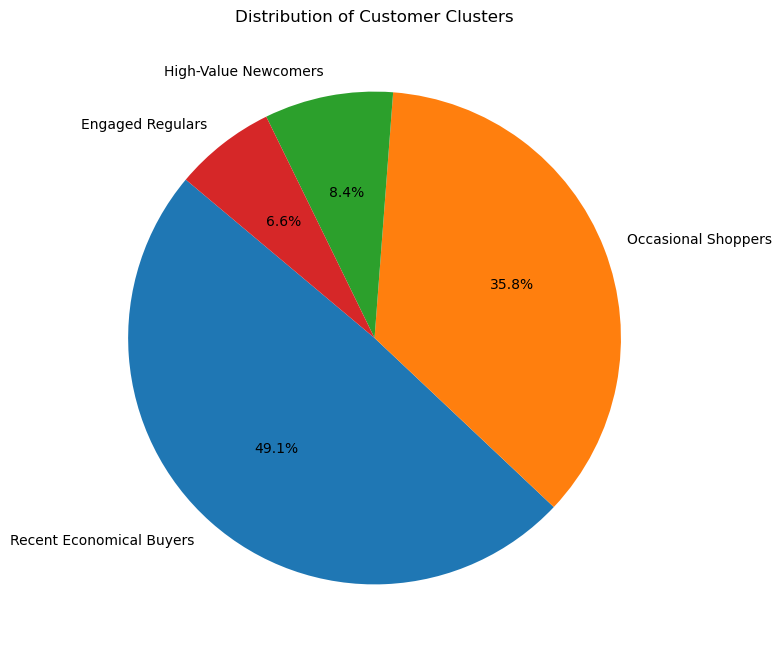

In [121]:
import matplotlib.pyplot as plt

# Assuming 'new_data' is your DataFrame and it includes a 'cluster' column with cluster labels
# Also assuming that cluster labels are 0, 1, 2, and 3, and you want to map these to the custom names

# Define the cluster names based on the cluster labels
cluster_names = {0: "Occasional Shoppers", 1: "Recent Economical Buyers", 2: "High-Value Newcomers", 3: "Engaged Regulars"}

# Count the number of occurrences of each cluster and map the labels to names
cluster_counts = data_cluster['cluster_by_kmeans'].value_counts().rename(index=cluster_names)

plt.figure(figsize=(10, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Clusters')
plt.show()


In [123]:
# Define the mapping from cluster labels to names
cluster_name_mapping = {
    0: "Occasional Shoppers",
    1: "Recent Economical Buyers",
    2: "High-Value Newcomers",
    3: "Engaged Regulars"
}

# Map the cluster labels to names
data_cluster['cluster_name'] = data_cluster['cluster_by_kmeans'].map(cluster_name_mapping)
data_cluster

,customer_unique_id,Recency,Frequency,Monetary,cluster_by_kmeans,cluster_name
0,0000366f3b9a7992bf8c76cfdf3221e2,116,2,129.90,3,Engaged Regulars
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,1,Recent Economical Buyers
2,0000f46a3911fa3c0805444483337064,542,1,69.00,0,Occasional Shoppers
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,0,Occasional Shoppers
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,0,Occasional Shoppers
...,...,...,...,...,...,...
94716,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1100.00,2,High-Value Newcomers
94717,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,0,Occasional Shoppers
94718,ffff371b4d645b6ecea244b27531430a,573,1,89.90,0,Occasional Shoppers
94719,ffff5962728ec6157033ef9805bacc48,124,1,115.00,1,Recent Economical Buyers


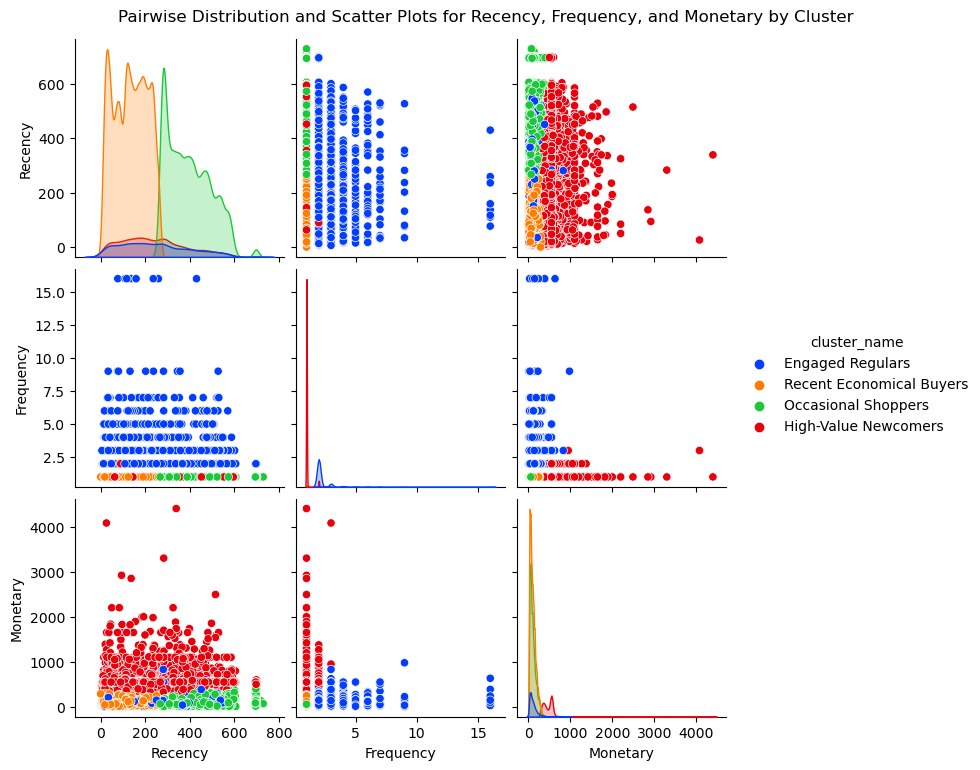

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_cluster, vars=['Recency', 'Frequency', 'Monetary'], hue='cluster_name', palette='bright')
plt.suptitle('Pairwise Distribution and Scatter Plots for Recency, Frequency, and Monetary by Cluster', y=1.02)
plt.show()


# Supervised Learning Model

### Objective: Customer Lifetime Value Prediction

The goal here is to predict the total value a customer will bring to the business over their entire relationship. It's a key metric that can help businesses tailor their marketing and customer service efforts.

Baseline Model
Let's start with a simple model as a baseline, such as linear regression. The goal here is not to achieve the best possible prediction out of the gate but to establish a benchmark for improvement.

We are going to do two models using different features: one model that includes the cluster labels and another that does not then we will valuate both models based on their prediction accuracy and we will proceed with the one that has a better evaluation metrics.

#### Let's start preparing the data

In [132]:
data_with_clusters = pd.get_dummies(data_cluster, columns=['cluster_name'])

data_with_clusters=data_with_clusters.merge(retail_merged_df[['customer_unique_id', 'delivery_time', 'review_score', 'freight_value']], on='customer_unique_id', how='left')

data_with_clusters

,customer_unique_id,Recency,Frequency,Monetary,cluster_by_kmeans,cluster_by_birch,cluster_name_Engaged Regulars,cluster_name_High-Value Newcomers,cluster_name_Occasional Shoppers,cluster_name_Recent Economical Buyers,delivery_time,review_score,freight_value
0,0000366f3b9a7992bf8c76cfdf3221e2,116,2,129.90,3,1,True,False,False,False,6,5.0,12.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,1,1,False,False,False,True,3,4.0,8.29
2,0000f46a3911fa3c0805444483337064,542,1,69.00,0,1,False,False,True,False,25,3.0,17.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,0,1,False,False,True,False,20,4.0,17.63
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,0,1,False,False,True,False,13,5.0,16.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1100.00,2,2,False,True,False,False,27,5.0,60.28
112368,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,0,1,False,False,True,False,30,4.0,19.69
112369,ffff371b4d645b6ecea244b27531430a,573,1,89.90,0,1,False,False,True,False,14,5.0,22.56
112370,ffff5962728ec6157033ef9805bacc48,124,1,115.00,1,1,False,False,False,True,11,5.0,18.69


In [133]:
X_with_clusters = data_with_clusters.drop(['customer_unique_id', 'Monetary', 'cluster_by_kmeans', 'cluster_by_birch'], axis=1)
X_without_clusters = data_with_clusters.drop(['customer_unique_id', 'Monetary', 'cluster_by_kmeans', 'cluster_by_birch', 'cluster_name_Engaged Regulars', 'cluster_name_High-Value Newcomers', 'cluster_name_Occasional Shoppers', 'cluster_name_Recent Economical Buyers'], axis=1)
y = data_with_clusters['Monetary']

First, we will import modeling functions from `src.supervised_learning.py` as demonstrated below. This will empower us to predict the Customer Lifetime Value (CLV), a critical metric indicating the total value a customer is expected to bring to the business over the entirety of their relationship. Utilizing these functions, we'll train and evaluate multiple models, including Linear Regression, Random Forest, XGBoost, and LightGBM, to forecast CLV based on various customer attributes. This predictive analysis aids in tailoring marketing and customer service efforts more effectively, ensuring resources are optimally allocated towards high-value customers.


In [134]:
sys.path.insert(0, '../') 
from Src.Supervised_Learning_Model import train_evaluate_linear_regression, train_evaluate_random_forest, train_evaluate_xgboost, train_evaluate_lightgbm

#### Let's compute the linear regression with clusters and without clusters

In [137]:
train_evaluate_linear_regression(X_with_clusters, y)

Linear Regression - RMSE: 128.71, MAE: 69.26, R²: 0.56


In [136]:
train_evaluate_linear_regression(X_without_clusters, y)

Linear Regression - RMSE: 184.01, MAE: 104.87, R²: 0.09


The RMSE and MAE are both lower in the model that includes cluster labels, indicating that predictions are closer to the actual values. A lower RMSE and MAE signify better model performance in terms of accuracy. The R² value, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s), is significantly higher (0.56) in the model with cluster labels compared to the one without (0.09). This suggests that including cluster labels as features in your model accounts for a more considerable portion of the variance in your target variable, providing a more accurate and reliable prediction.

Therefore, the model that includes cluster labels is the better choice for proceeding, as it demonstrates a higher predictive accuracy and explains a more significant proportion of the variance in the data. This result emphasizes the value of incorporating cluster information into predictive models, showcasing how unsupervised learning techniques like clustering can enrich supervised learning tasks by revealing hidden patterns in the data that improve model performance.

##### From now on we will compute only the data with clusters

#### Let's start with computing each models

In [138]:
train_evaluate_random_forest(X_with_clusters, y)

Random Forest - RMSE: 68.05, MAE: 40.65, R²: 0.88


In [139]:
train_evaluate_xgboost(X_with_clusters, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost - RMSE: 72.59, MAE: 47.02, R²: 0.86


In [140]:
train_evaluate_lightgbm(X_with_clusters, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 89897, number of used features: 9
[LightGBM] [Info] Start training from score 153.959517
LightGBM - RMSE: 100.37, MAE: 59.17, R²: 0.73


###  Starting with a simple model, we used linear regression to set a baseline for our predictions. This gave us an initial understanding with a certain level of accuracy (RMSE: 128.71, MAE: 69.26, R²: 0.56). Moving on, we tried the Random Forest model, which greatly improved our predictions, making it much more accurate (RMSE: 68.05, MAE: 40.65, R²: 0.88). This showed us that more complex models can do a better job at understanding our data. We didn't stop there; we also tested out XGBoost and LightGBM models. XGBoost did really well too, showing similar improvements (RMSE: 72.59, R²: 0.86). LightGBM was also good but not as accurate as Random Forest or XGBoost (RMSE: 100.37, R²: 0.73). In the end, Random Forest stood out as the top performer, offering the best mix of accuracy and understanding of our data, making it the best choice for our project.

So, As random Forest has a better accuracy, let's use this model to get which feature is important

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have an XGBoost model trained and named 'xgboost_model'
# and your feature names in a list called 'feature_names
linear=LinearRegress
feature_importances = li.feature_importances_

# Create a pandas series for easy plotting
import pandas as pd
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# Transitioning from Supervised Learning to Time Series Forecasting with LSTM

#### We are doing here an aggregate Sales Prediction:
Objective: To forecast the total Monetary value across all customers, potentially for inventory planning, revenue forecasting, or other macro-level business insights.
Data Structure: The data would be aggregated at regular intervals (e.g., daily, weekly) to create a single time series that represents the total Monetary value over time.
Use Case: This is commonly used for overall business planning, assessing the health of the business, or preparing for seasonal demands.

We are doing here a univariate time series model for predicting total sales over time so we are indeed working with essentially a single variable: the total sales aggregated over regular time intervals (like daily or monthly sales). The future sales are predicted based on the historical pattern of sales alone, without additional independent variables.

In [62]:
data_cluster.shape

(94721, 4)

In [63]:
retail_merged_df.shape

(112372, 15)

In [14]:
new_data = data_cluster[['customer_unique_id', 'Monetary']].merge(
    retail_merged_df[['customer_unique_id', 'order_purchase_timestamp']],
    on='customer_unique_id', 
    how='left'
)
new_data = new_data.drop(columns=['customer_unique_id'])
new_data.shape

(112372, 2)

In [15]:
new_data['order_purchase_timestamp'] = pd.to_datetime(new_data['order_purchase_timestamp'])

In [16]:
daily_sales = new_data.groupby(new_data['order_purchase_timestamp'].dt.date)['Monetary'].sum()

In [18]:
daily_sales

order_purchase_timestamp
2016-09-04     145.78
2016-09-05      59.50
2016-09-15     404.91
2016-10-02     100.00
2016-10-03     538.47
               ...   
2018-08-26    8763.90
2018-08-27    5976.77
2018-08-28    5159.19
2018-08-29    3795.04
2018-09-03     290.00
Name: Monetary, Length: 616, dtype: float64

In [19]:
# First, normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

# Create sequences of a specified length (e.g., look back 30 days to predict the 31st day)
look_back = 30
X, y = [], []
for i in range(look_back, len(scaled_sales)):
    X.append(scaled_sales[i-look_back:i, 0])
    y.append(scaled_sales[i, 0])
X, y = np.array(X), np.array(y)

# Reshape input to be [samples, time steps, features]
Z = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# The data is now ready for LSTM model training


First, we will import LSTM modeling functions from `src.time_series_lstm.py` as demonstrated below. This step equips us to embark on forecasting the total monetary value across all customer transactions over time, a vital undertaking for inventory planning, revenue forecasting, and strategic business analysis. By leveraging these functions, we'll construct and evaluate two LSTM models: a basic single-layer LSTM model for foundational time series forecasting and a more complex, stacked LSTM model with dropout layers designed to capture intricate patterns in the data while mitigating the risk of overfitting.

The basic LSTM model serves as our entry point into time series analysis, providing a straightforward approach to understanding temporal sales dynamics based on historical data. Meanwhile, the stacked LSTM model introduces additional layers and complexity, potentially offering enhanced forecasting accuracy by capturing deeper temporal dependencies.


Through this predictive modeling, we aim to gain insights into sales trends, seasonality, and other underlying patterns that drive the monetary transactions within the business. This analysis not only aids in optimizing inventory levels to meet future demand but also supports broader business strategies through informed revenue projections and resource allocation. By accurately forecasting future sales, the business can ensure that resources are efficiently directed towards areas of anticipated growth, ultimately fostering a more agile and responsive operational framework.

In [20]:
sys.path.insert(0, '../')
from Src.Time_Series_LSTM import build_basic_lstm_model, build_stacked_lstm_model, train_model

#### The basic LSTM model

In [61]:
model_1 = build_basic_lstm_model(input_shape=(30, 1))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Train the model and capture the history
history_1 = train_model(model_1, X_train, y_train, X_test, y_test, epochs=100, batch_size=32)

Epoch 1/100
15/15 - 1s - loss: 0.0102 - val_loss: 0.0050 - 1s/epoch - 77ms/step
Epoch 2/100
15/15 - 0s - loss: 0.0047 - val_loss: 0.0050 - 126ms/epoch - 8ms/step
Epoch 3/100
15/15 - 0s - loss: 0.0043 - val_loss: 0.0046 - 125ms/epoch - 8ms/step
Epoch 4/100
15/15 - 0s - loss: 0.0040 - val_loss: 0.0044 - 124ms/epoch - 8ms/step
Epoch 5/100
15/15 - 0s - loss: 0.0037 - val_loss: 0.0042 - 120ms/epoch - 8ms/step
Epoch 6/100
15/15 - 0s - loss: 0.0036 - val_loss: 0.0044 - 129ms/epoch - 9ms/step
Epoch 7/100
15/15 - 0s - loss: 0.0036 - val_loss: 0.0042 - 124ms/epoch - 8ms/step
Epoch 8/100
15/15 - 0s - loss: 0.0035 - val_loss: 0.0042 - 123ms/epoch - 8ms/step
Epoch 9/100
15/15 - 0s - loss: 0.0035 - val_loss: 0.0042 - 127ms/epoch - 8ms/step
Epoch 10/100
15/15 - 0s - loss: 0.0035 - val_loss: 0.0043 - 127ms/epoch - 8ms/step
Epoch 11/100
15/15 - 0s - loss: 0.0035 - val_loss: 0.0042 - 131ms/epoch - 9ms/step
Epoch 12/100
15/15 - 0s - loss: 0.0034 - val_loss: 0.0042 - 121ms/epoch - 8ms/step
Epoch 13/100
15

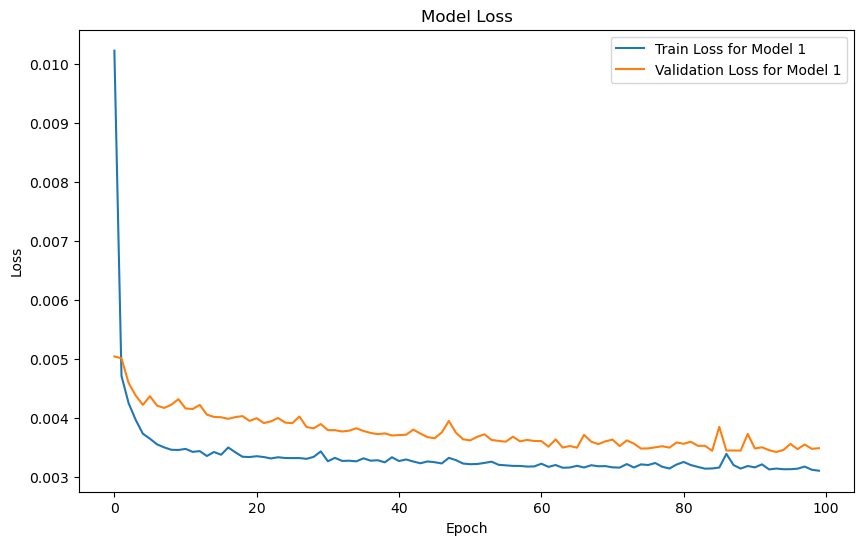

In [63]:
# Plot the training and validation loss for Model 1
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='Train Loss for Model 1')
plt.plot(history_1.history['val_loss'], label='Validation Loss for Model 1')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [64]:
# Make predictions with Model 1
y_pred_1 = model_1.predict(X_test)

# Inverse transform predictions and actuals to compare actual sales values
y_test_inv_1 = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv_1 = scaler.inverse_transform(y_pred_1)

# Calculate RMSE for Model 1
rmse_1 = np.sqrt(mean_squared_error(y_test_inv_1, y_pred_inv_1))
print(f'Test RMSE for Model 1: {rmse_1:.3f}')
mae =np.sqrt( mean_absolute_error(y_test_inv_1, y_pred_inv_1))
print(f'Mean Absolute Error (MAE): {mae:.3f}')
# Repeat the process for Model 2 (Stacked LSTM with Dropout) as needed

4/4 [==============================] - 0s 3ms/step
Test RMSE for Model 1: 13201.914
Mean Absolute Error (MAE): 99.894


### The Stacked LSTM

In [54]:
model_2 = build_stacked_lstm_model(input_shape=(30, 1))
model_2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
history_2 = train_model(model_2, X_train, y_train, X_test, y_test, epochs=100, batch_size=32)

Epoch 1/100

15/15 - 3s - loss: 0.0107 - val_loss: 0.0054 - 3s/epoch - 168ms/step
Epoch 2/100
15/15 - 0s - loss: 0.0057 - val_loss: 0.0060 - 249ms/epoch - 17ms/step
Epoch 3/100
15/15 - 0s - loss: 0.0047 - val_loss: 0.0054 - 249ms/epoch - 17ms/step
Epoch 4/100
15/15 - 0s - loss: 0.0042 - val_loss: 0.0050 - 258ms/epoch - 17ms/step
Epoch 5/100
15/15 - 0s - loss: 0.0041 - val_loss: 0.0052 - 244ms/epoch - 16ms/step
Epoch 6/100
15/15 - 0s - loss: 0.0040 - val_loss: 0.0050 - 246ms/epoch - 16ms/step
Epoch 7/100
15/15 - 0s - loss: 0.0040 - val_loss: 0.0049 - 235ms/epoch - 16ms/step
Epoch 8/100
15/15 - 0s - loss: 0.0039 - val_loss: 0.0048 - 222ms/epoch - 15ms/step
Epoch 9/100
15/15 - 0s - loss: 0.0041 - val_loss: 0.0048 - 234ms/epoch - 16ms/step
Epoch 10/100
15/15 - 0s - loss: 0.0040 - val_loss: 0.0047 - 229ms/epoch - 15ms/step
Epoch 11/100
15/15 - 0s - loss: 0.0038 - val_loss: 0.0052 - 241ms/epoch - 16ms/step
Epoch 12/100
15/15 - 0s - loss: 0.0041 - val_loss: 0.0047 - 226ms/epoch - 15ms/step
Ep

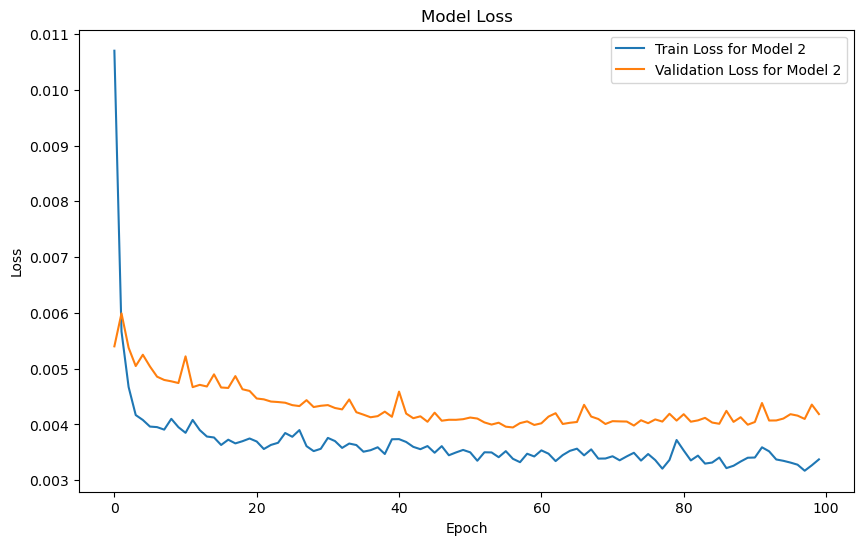

In [66]:
# Plot the training and validation loss for Model 2
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Train Loss for Model 2')
plt.plot(history_2.history['val_loss'], label='Validation Loss for Model 2')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [59]:
# Make predictions with Model 1
y_pred_1 = model_2.predict(X_test)

# Inverse transform predictions and actuals to compare actual sales values
y_test_inv_1 = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv_1 = scaler.inverse_transform(y_pred_1)

# Calculate RMSE for Model 1
rmse_1 = np.sqrt(mean_squared_error(y_test_inv_1, y_pred_inv_1))
print(f'Test RMSE for Model 1: {rmse_1:.3f}')
mae =np.sqrt( mean_absolute_error(y_test_inv_1, y_pred_inv_1))
print(f'Mean Absolute Error (MAE): {mae:.3f}')


4/4 [==============================] - 0s 6ms/step
Test RMSE for Model 1: 14463.906
Mean Absolute Error (MAE): 103.612


#### Based on the metrics provided, while Model 1 performs better than Model 2, both models exhibit relatively high RMSE values in the context of predicting daily sales monetary values. This suggests better performance for model 1 the complexity of the second model which has additional dropout layers despite. We need to notice here while Model 1 is the more accurate of the two, neither model is particularly effective at predicting the monetary values with high precision.

#### The high RMSE and MAE values indicate that the predictions made by both models can deviate significantly from the actual sales values. This level of error suggests that, in their current state, the models may not be reliable enough for making precise business decisions or forecasting with a high degree of accuracy.

#### This limitation is may be due to by the unpredictable nature of daily sales figures, which can fluctuate due to numerous uncontrollable factors such as market trends, consumer behavior changes, and external events. In general, these findings suggest that relying solely on time series analysis for predicting total monetary values presents significant challenges